## Assignment_1

Use a given input as a dataset to train the single layer perceptron to learn this pattern. Instead of using the AND or OR operators, use the same code in order to classify whether a person will earn or not a salary increase. Variables - age and education.

inputs=np.array([[18,2], [20,3], [21, 4], [35,15], [36,16], [38, 18]])
outputs=np.array([0, 0, 0, 1, 1, 1])

Class "0" (zero) indicates a person won't earn a salary increase, otherwise, class "1" (one) indicates a person will earn a salary increase. After training the single layer perceptron, use the new instances below to make predictions. Will the instances below be classified 0 or 1?

test_inputs=np.array([[17,5], [25,8], [45,10], [31,20]])

In [85]:
# loading libraries
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler



In [86]:
inputs=np.array([[18,2], [20,3], [21, 4], [35,15], [36,16], [38, 18]]) 
# the input has to be normalized before training
scaler = MinMaxScaler()
print(scaler.fit(inputs))
inputs=scaler.transform(inputs)
inputs # the input data has been normalized


MinMaxScaler()


array([[0.    , 0.    ],
       [0.1   , 0.0625],
       [0.15  , 0.125 ],
       [0.85  , 0.8125],
       [0.9   , 0.875 ],
       [1.    , 1.    ]])

In [87]:
inputs.shape # describes the number of dimensions and the size of each dimension of the array

(6, 2)

In [88]:
outputs=np.array([0, 0, 0, 1, 1, 1])
weights=np.array([0.0,0.0])
learning_rate=0.1 # parameter of neural network that indicates how fast the processing will be done
outputs.shape

(6,)

In [89]:
def step_function(sum):
    if (sum >= 1):
        return 1
    return 0

In [90]:
def calculate_output(instance):
    s=instance.dot(weights)
    return step_function(s)

In [91]:
def train():
    total_error=1
    while (total_error !=0):
        total_error=0
        for i in range(len(outputs)):
            prediction=calculate_output(inputs[i]) # go through each of the instances
            error = abs(outputs[i]-prediction) # abs is absolute f-ion
            total_error+=error # accumulating error in the variable total error
            if error>0:
                for j in range(len(weights)):
                    weights[j]=weights[j]+(learning_rate*inputs[i][j]*error)
                    # inputs[i][j] - because we have a matrix in the inputs
                    print('Weight updated: '+str(weights[j]))
                print('Total error: '+ str(total_error))

train()

Weight updated: 0.085
Weight updated: 0.08125
Total error: 1
Weight updated: 0.17500000000000002
Weight updated: 0.16875
Total error: 2
Weight updated: 0.275
Weight updated: 0.26875000000000004
Total error: 3
Weight updated: 0.36000000000000004
Weight updated: 0.35000000000000003
Total error: 1
Weight updated: 0.45000000000000007
Weight updated: 0.43750000000000006
Total error: 2
Weight updated: 0.55
Weight updated: 0.5375000000000001
Total error: 3
Weight updated: 0.635
Weight updated: 0.6187500000000001
Total error: 1


### Visualization

In [92]:
import pandas as pd
df1=pd.DataFrame(data=inputs, columns=["Age","Education"])
df1


,Age,Education
0,0.00,0.0000
1,0.10,0.0625
2,0.15,0.1250
3,0.85,0.8125
4,0.90,0.8750
5,1.00,1.0000


In [93]:
df2=pd.DataFrame(data=outputs, columns=["Class"])
df=pd.concat([df1,df2],axis=1)
df

,Age,Education,Class
0,0.00,0.0000,0
1,0.10,0.0625,0
2,0.15,0.1250,0
3,0.85,0.8125,1
4,0.90,0.8750,1
5,1.00,1.0000,1


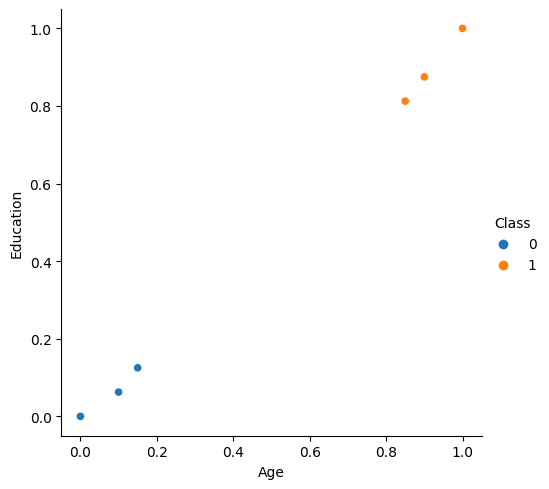

In [94]:
import seaborn as sb
sb.relplot(x="Age",y="Education",data=df,hue="Class")



### Classification

In [95]:
weights

array([0.635  , 0.61875])

In [96]:
test_inputs=np.array([[17,5],[25,8],[45,10],[31,20]])
test_inputs

array([[17,  5],
       [25,  8],
       [45, 10],
       [31, 20]])

In [97]:
test_inputs=scaler.transform(test_inputs) # normalize test_inputs as same as with train data previously
test_inputs

array([[-0.05  ,  0.1875],
       [ 0.35  ,  0.375 ],
       [ 1.35  ,  0.5   ],
       [ 0.65  ,  1.125 ]])

In [98]:
for i in range(len(test_inputs)):
    # print(test_inputs[i]) to check
    print(calculate_output(test_inputs[i]))

0
0
1
1
